In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Embedding, Input, BatchNormalization, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv

--2023-09-14 22:59:31--  https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.01s   

2023-09-14 22:59:32 (36.1 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [5]:
data = 'spam.csv'

In [6]:
df = pd.read_csv(data, encoding='latin-1')

In [7]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [8]:
df = df.to_numpy()

In [9]:
np.random.shuffle(df)

In [10]:
validation_split = 0.2

In [11]:
Y = df[:, 0]

In [12]:
for i in range(len(Y)):
  if Y[i] == 'ham':
    Y[i] = 0
  elif Y[i] == 'spam':
    Y[i] = 1

In [13]:
X = df[:, 1]

In [14]:
Xtrain = X[: -int(validation_split*len(X))]
Ytrain = Y[: -int(validation_split*len(X))].astype(np.float32)
Xtest = X[-int(validation_split*len(X)) :]
Ytest = Y[-int(validation_split*len(X)) :].astype(np.float32)

In [15]:
N = len(Xtrain)

In [16]:
MAX_VOCAB_LEN = 20_000
tokenizer = Tokenizer(num_words=MAX_VOCAB_LEN)
tokenizer.fit_on_texts(Xtrain)
tokenizer.fit_on_texts(Xtest)

In [17]:
Xtrain_seq = tokenizer.texts_to_sequences(Xtrain)
Xtest_seq = tokenizer.texts_to_sequences(Xtest)

In [18]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'get': 31,
 'be': 32,
 'if': 33,
 'will': 34,
 'ur': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 'gt': 41,
 '4': 42,
 'lt': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'free': 47,
 'from': 48,
 'how': 49,
 'go': 50,
 'all': 51,
 'out': 52,
 'what': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'got': 58,
 'was': 59,
 'come': 60,
 'its': 61,
 'am': 62,
 'time': 63,
 'only': 64,
 'day': 65,
 'love': 66,
 'there': 67,
 'send': 68,
 'he': 69,
 'want': 70,
 'text': 71,
 'as': 72,
 'txt': 73,
 'one': 74,
 'going': 75,
 'by': 76,
 "i'll": 77,
 'home': 78,
 'need': 79,
 'about': 80,
 'lor': 81,
 'r': 82,
 'sorry': 83,
 'stop': 84,
 'st

In [19]:
V = len(tokenizer.word_index)

In [20]:
V

8920

In [21]:
T = 50

In [22]:
Xtrain = pad_sequences(Xtrain_seq, padding='post', maxlen=50).astype(np.float32)
Xtest = pad_sequences(Xtest_seq, padding='post', maxlen=50).astype(np.float32)

In [23]:
Xtrain.shape

(4458, 50)

In [24]:
i = Input(shape=(50, ))
x = Embedding(50, V+1)(i)
x = Conv1D(32, 2, activation='relu')(x)
x = MaxPool1D(2)(x)
x = Conv1D(64, 2, activation='relu')(x)
x = MaxPool1D(2)(x)
x = Conv1D(128, 2, activation='relu')(x)
x = MaxPool1D(2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)

In [25]:
model = Model(i, x)

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [27]:
model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=5)

Epoch 1/5
140/140 [==============================] - 28s 159ms/step - loss: 0.1650 - accuracy: 0.9374 - val_loss: 0.2566 - val_accuracy: 0.9264
Epoch 2/5
140/140 [==============================] - 8s 56ms/step - loss: 0.0986 - accuracy: 0.9670 - val_loss: 0.1444 - val_accuracy: 0.9587
Epoch 3/5
140/140 [==============================] - 8s 53ms/step - loss: 0.0777 - accuracy: 0.9740 - val_loss: 0.1561 - val_accuracy: 0.9506
Epoch 4/5
140/140 [==============================] - 4s 30ms/step - loss: 0.0636 - accuracy: 0.9805 - val_loss: 0.1217 - val_accuracy: 0.9605
Epoch 5/5
140/140 [==============================] - 3s 21ms/step - loss: 0.0439 - accuracy: 0.9854 - val_loss: 0.1414 - val_accuracy: 0.9641


In [28]:
r = model.history

In [29]:
acc = r.history['accuracy']
loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']

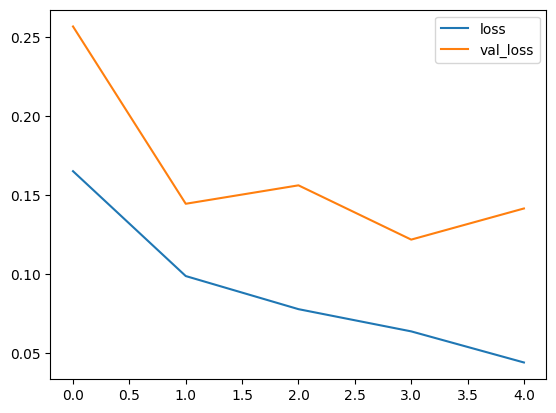

In [30]:
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()

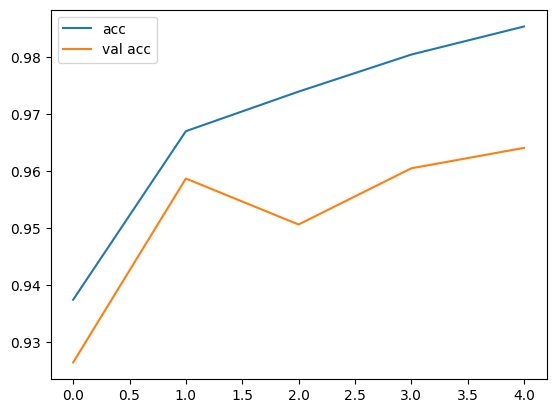

In [31]:
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val acc')
plt.legend()